In [23]:
import tensorflow as tf
#import tensorflow_quantum as tfq
import cirq
import matplotlib.pyplot as plt
import numpy as np

In [26]:
print("TensorFlow version:", tf.__version__)
#print("TensorFlow Quantum version:", tfq.__version__)

TensorFlow version: 2.11.0


## Hamiltonian:
Define a simple Hamiltonian matrix for the quantum system.
The Hamiltonian defines the total energy of the system.
Here, I am using a simple 2x2 matrix as an example.

In [27]:
H = tf.constant([[1.0, 0.5], [0.5, 1.0]], dtype=tf.complex128)

## Initial state:
Define the initial state of the quantum system.
psi0 represents the quantum state vector at time t=0.

In [28]:
psi0 = tf.constant([1.0, 0.0], dtype=tf.complex128)

Define a function for evolving the state over time.
This function uses the matrix exponential to calculate the unitary evolution operator, which is then applied to the current state to get the state at the next time step.

In [29]:
def evolve(state, H, dt):
    U = tf.linalg.expm(-1j * H * dt)
    return tf.linalg.matvec(U, state)

In [37]:
# Define the time range and steps for the simulation.
times = np.linspace(0, 10, 399)
dt = times[1] - times[0]  # Time step

Initialize a list to hold the state at each time step.
Starting with the initial state.

In [31]:
states = [psi0]

In [ ]:
# Loop over time steps to evolve the system.
for _ in range(1, len(times)):
    states.append(evolve(states[-1], H, dt))

Calculate the probability of finding the system in each state at each time step. The probabilities are the absolute squares of the state amplitudes.

In [33]:
probs = [tf.abs(state)**2 for state in states]

Plot the probabilities as a function of time.
This gives us an idea of how the system evolves.

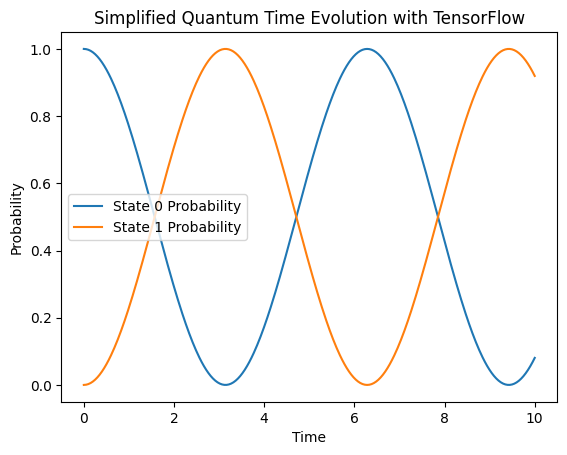

In [38]:
plt.figure()
plt.plot(times, [prob[0].numpy() for prob in probs], label="State 0 Probability")
plt.plot(times, [prob[1].numpy() for prob in probs], label="State 1 Probability")
plt.title('Simplified Quantum Time Evolution with TensorFlow')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()

### The same simulation with Monte Carlo gives different plot structure.
The NumPy/SciPy implementation uses a manual Monte Carlo simulation in which stochastic behavior is simulated by generating random noise, and the system's state is gradually evolved over time using the Schrödinger equation. This method uses numerical integration techniques to estimate the quantum system's time evolution.

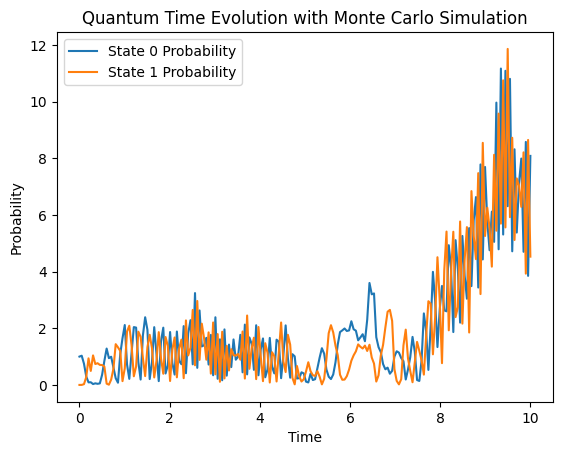

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm  # Import expm from scipy.linalg

# Define the simple Hamiltonian matrix for our quantum system.
H = np.array([[1.0, 0.5], [0.5, 1.0]], dtype=np.complex128)

# Define the initial state of the quantum system.
psi0 = np.array([1.0, 0.0], dtype=np.complex128)

# Define the time range and steps for the simulation.
times = np.linspace(0.0, 10.0, 200)
dt = times[1] - times[0]  # Time step

# Define a custom Monte Carlo simulation function to evolve the state over time.
def monte_carlo_simulation(H, psi0, times, dt):
    states = [psi0]  # List to hold the state at each time step
    for t in times[1:]:
        # Generate a random number to simulate stochastic behavior
        noise = np.random.normal(loc=0, scale=np.sqrt(dt))
        # Evolve the state using the Schrödinger equation
        U = expm(-1j * H * t)  # Use expm from scipy.linalg
        psi_t = np.dot(U, states[-1]) + noise
        states.append(psi_t)
    return np.array(states)

# Run the Monte Carlo simulation to evolve the system over time.
states = monte_carlo_simulation(H, psi0, times, dt)

# Calculate the probabilities of finding the system in each state at each time step.
probs = np.abs(states)**2

# Plot the probabilities as a function of time.
plt.figure()
plt.plot(times, probs[:, 0], label="State 0 Probability")
plt.plot(times, probs[:, 1], label="State 1 Probability")
plt.title('Quantum Time Evolution with Monte Carlo Simulation')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.legend()
plt.show()
